In [1]:
import pandas as pd

In [2]:
movies = pd.read_pickle("./data/movies.p")
financials = pd.read_pickle("./data/financials.p")

In [3]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [4]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [5]:
movies_financials = movies.merge(right=financials, on="id", how="left")

movies_financials.head()

,id,title,popularity,release_date,budget,revenue
0,257,Oliver Twist,20.415572,2005-09-23,50000000.0,42093706.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,NaN,NaN
2,38365,Grown Ups,38.864027,2010-06-24,80000000.0,271430189.0
3,9672,Infamous,3.680896,2006-11-16,13000000.0,1151330.0
4,12819,Alpha and Omega,12.300789,2010-09-17,20000000.0,39300000.0


In [9]:
number_of_missing_fin = movies_financials["budget"].isnull().count()
number_of_missing_fin

4803

In [10]:
number_of_missing_fin = movies_financials["budget"].isnull().sum()
number_of_missing_fin

1574

# Enriching a dataset

In [13]:
toy_story = movies[movies['title'].str.contains("Toy Story")]
taglines = pd.read_pickle("./data/taglines.p")

In [19]:
toy_story.head()

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [14]:
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [15]:
toystory_tag = toy_story.merge(right=taglines, on="id", how="left")
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [16]:
toystory_tag.shape

(3, 5)

In [22]:
toystory_tag = toy_story.merge(right=taglines, on="id", how="inner")
toystory_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


In [23]:
toystory_tag.shape

(2, 5)

# Other joins

In [26]:
movie_to_genres = pd.read_pickle("./data/movie_to_genres.p")

In [27]:
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action']
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction']

In [28]:
action_movies.head()

,movie_id,genre
3,11,Action
14,18,Action
25,22,Action
26,24,Action
42,58,Action


In [29]:
scifi_movies.head()

,movie_id,genre
2,11,Science Fiction
17,18,Science Fiction
20,19,Science Fiction
38,38,Science Fiction
49,62,Science Fiction


In [30]:
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [32]:
action_scifi = action_movies.merge(right=scifi_movies, on="movie_id", how="right", suffixes=["_act", "_sci"])

action_scifi.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [36]:
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]

scifi_only.head()

,movie_id,genre_act,genre_sci
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction
5,68,NaN,Science Fiction
6,74,NaN,Science Fiction


In [37]:
movies_and_scifi_only = movies.merge(right=scifi_only, left_on="id", right_on="movie_id", how="right")
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,19,Metropolis,32.351527,1927-01-10,19,NaN,Science Fiction
1,38,Eternal Sunshine of the Spotless Mind,56.481487,2004-03-19,38,NaN,Science Fiction
2,62,2001: A Space Odyssey,86.201184,1968-04-10,62,NaN,Science Fiction
3,68,Brazil,41.089863,1985-02-20,68,NaN,Science Fiction
4,74,War of the Worlds,48.572726,2005-06-28,74,NaN,Science Fiction


In [38]:
movies_and_scifi_only = movies.merge(right=scifi_only, left_on="id", right_on="movie_id", how="inner")
movies_and_scifi_only.head()

,id,title,popularity,release_date,movie_id,genre_act,genre_sci
0,18841,The Lost Skeleton of Cadavra,1.680525,2001-09-12,18841,NaN,Science Fiction
1,26672,The Thief and the Cobbler,2.439184,1993-09-23,26672,NaN,Science Fiction
2,15301,Twilight Zone: The Movie,12.902975,1983-06-24,15301,NaN,Science Fiction
3,8452,The 6th Day,18.447479,2000-11-17,8452,NaN,Science Fiction
4,1649,Bill & Ted's Bogus Journey,11.349664,1991-07-19,1649,NaN,Science Fiction


In [39]:
movies_and_scifi_only.shape

(258, 7)

## Popular genres with right join

In [41]:
pop_movies = pd.read_csv("./data/pop_movies.csv")

In [42]:
pop_movies.head()

,id,title,popularity,release_date
0,211672,Minions,875.581,2015-06-17
1,157336,Interstellar,724.248,2014-11-05
2,293660,Deadpool,514.570,2016-02-09
3,118340,Guardians of the Galaxy,481.099,2014-07-30
4,76341,Mad Max: Fury Road,434.279,2015-05-13


In [45]:
movie_to_genres.head()

,movie_id,genre
0,5,Crime
1,5,Comedy
2,11,Science Fiction
3,11,Action
4,11,Adventure


In [46]:
genres_movies = movie_to_genres.merge(right=pop_movies, left_on="movie_id", right_on="id", how="right")
genres_movies.head()

,movie_id,genre,id,title,popularity,release_date
0,211672,Comedy,211672,Minions,875.581,2015-06-17
1,211672,Adventure,211672,Minions,875.581,2015-06-17
2,211672,Animation,211672,Minions,875.581,2015-06-17
3,211672,Family,211672,Minions,875.581,2015-06-17
4,157336,Drama,157336,Interstellar,724.248,2014-11-05


In [56]:
genre_count = genres_movies.groupby("genre").agg({"id":"count"})
genre_count

,id
genre,
Action,7
Adventure,9
Animation,2
Comedy,3
Drama,2
Family,2
Fantasy,1
Science Fiction,6
Thriller,4


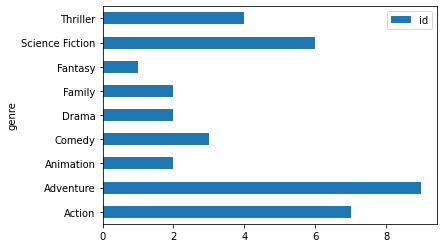

In [54]:
import matplotlib.pyplot as plt

genre_count.plot(kind='barh')
plt.show()

## Using outer join to select actors

In [57]:
iron_1_actors = pd.read_csv("./data/iron_1_actors.csv")
iron_2_actors = pd.read_csv("./data/iron_2_actors.csv")

In [58]:
iron_1_actors.head()

,character,id,name
0,Yinsen,17857,Shaun Toub
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges
3,War Machine,18288,Terrence Howard
4,Christine Everhart,57451,Leslie Bibb


In [59]:
iron_2_actors.head()

,character,id,name
0,Ivan Vanko / Whiplash,2295,Mickey Rourke
1,Natalie Rushman / Natasha Romanoff / Black Widow,1245,Scarlett Johansson
2,Justin Hammer,6807,Sam Rockwell
3,Director Nick Fury,2231,Samuel L. Jackson
4,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow


In [61]:
iron_1_and_2 = iron_1_actors.merge(right=iron_2_actors, on="id", how="outer", suffixes=["_1", "_2"])

iron_1_and_2.head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts",Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
4,Christine Everhart,57451,Leslie Bibb,Christine Everhart,Leslie Bibb


In [67]:
m = ((iron_1_and_2["name_1"].isnull()) | (iron_1_and_2["name_2"].isnull()))
m.head()

0     True
1    False
2     True
3     True
4    False
dtype: bool

In [68]:
iron_1_and_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


# Self join

In [69]:
crews = pd.read_pickle("./data/crews.p")

In [70]:
crews.head()

,id,department,job,name
0,19995,Editing,Editor,Stephen E. Rivkin
2,19995,Sound,Sound Designer,Christopher Boyes
4,19995,Production,Casting,Mali Finn
6,19995,Directing,Director,James Cameron
7,19995,Writing,Writer,James Cameron


In [73]:
crews_self_merged = crews.merge(right=crews, on="id", how="inner", suffixes=["_dir", "_crew"])

crews_self_merged.head()

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
0,19995,Editing,Editor,Stephen E. Rivkin,Editing,Editor,Stephen E. Rivkin
1,19995,Editing,Editor,Stephen E. Rivkin,Sound,Sound Designer,Christopher Boyes
2,19995,Editing,Editor,Stephen E. Rivkin,Production,Casting,Mali Finn
3,19995,Editing,Editor,Stephen E. Rivkin,Directing,Director,James Cameron
4,19995,Editing,Editor,Stephen E. Rivkin,Writing,Writer,James Cameron


In [74]:
boolean_filter = ((crews_self_merged["job_dir"] == "Director") & (crews_self_merged["job_crew"] != "Director"))

In [76]:
direct_crews = crews_self_merged[boolean_filter]
direct_crews

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


# Index Merge

In [86]:
ratings = pd.read_pickle("./data/ratings.p")
movies = pd.read_pickle("./data/movies.p")

ratings.set_index("id" ,inplace=True)
movies.set_index("id" ,inplace=True)

In [87]:
ratings.head()

,vote_average,vote_count
id,,
19995,7.2,11800.0
285,6.9,4500.0
206647,6.3,4466.0
49026,7.6,9106.0
49529,6.1,2124.0


In [88]:
movies.head()

,title,popularity,release_date
id,,,
257,Oliver Twist,20.415572,2005-09-23
14290,Better Luck Tomorrow,3.877036,2002-01-12
38365,Grown Ups,38.864027,2010-06-24
9672,Infamous,3.680896,2006-11-16
12819,Alpha and Omega,12.300789,2010-09-17


In [89]:
movies_ratings = movies.merge(right=ratings, on="id", how="left")
movies_ratings.head()

,title,popularity,release_date,vote_average,vote_count
id,,,,,
257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
9672,Infamous,3.680896,2006-11-16,6.4,60.0
12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


## Do sequels earn more?

In [95]:
sequels = pd.read_pickle("data/sequels.p")
financials = pd.read_pickle("data/financials.p")

sequels.set_index("id", inplace=True)
financials.set_index("id", inplace=True)

In [96]:
sequels.head()

,title,sequel
id,,
19995,Avatar,<NA>
862,Toy Story,863
863,Toy Story 2,10193
597,Titanic,<NA>
24428,The Avengers,<NA>


In [97]:
financials.head()

,budget,revenue
id,,
19995,237000000,2.787965e+09
285,300000000,9.610000e+08
206647,245000000,8.806746e+08
49026,250000000,1.084939e+09
49529,260000000,2.841391e+08


In [98]:
sequels_fin = sequels.merge(right=financials, on="id", how="left")

sequels_fin.head()

,title,sequel,budget,revenue
id,,,,
19995,Avatar,<NA>,237000000.0,2.787965e+09
862,Toy Story,863,30000000.0,3.735540e+08
863,Toy Story 2,10193,90000000.0,4.973669e+08
597,Titanic,<NA>,200000000.0,1.845034e+09
24428,The Avengers,<NA>,220000000.0,1.519558e+09
